In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('./data/train.csv', index_col=['PassengerId'])

In [6]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
for col in list(df.columns):
    print("# missing on variable {} => {:.0%}".format(col, df[col].isnull().sum() / len(df)))

# missing on variable Survived => 0%
# missing on variable Pclass => 0%
# missing on variable Name => 0%
# missing on variable Sex => 0%
# missing on variable Age => 20%
# missing on variable SibSp => 0%
# missing on variable Parch => 0%
# missing on variable Ticket => 0%
# missing on variable Fare => 0%
# missing on variable Cabin => 77%
# missing on variable Embarked => 0%


In [20]:
# impute missing
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Cabin'].fillna('_MISSING_', inplace=True)
df['Embarked'].fillna('_MISSING_', inplace=True)

In [23]:
df[['Age', 'Fare']].describe()

,Age,Fare
count,891.000000,891.000000
mean,29.699118,32.204208
std,13.002015,49.693429
min,0.420000,0.000000
25%,22.000000,7.910400
50%,29.699118,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


In [24]:
import seaborn as sns
sns.set(style="ticks", palette="pastel")

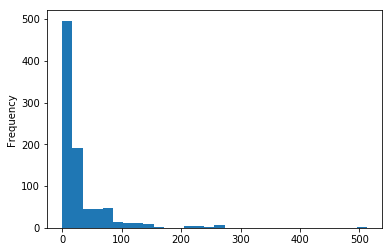

In [36]:
df['Fare'].plot.hist(bins=30)

In [40]:
df['Fare_clip'] = df['Fare'].clip(lower=0, upper=df['Fare'].quantile(q=0.95))
df.drop('Fare', axis=1, inplace=True)

In [41]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Fare_clip
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,_MISSING_,S,7.2500
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C85,C,71.2833
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,_MISSING_,S,7.9250
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,C123,S,53.1000
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,_MISSING_,S,8.0500


In [46]:
df.SibSp.value_counts(normalize=True)

0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64

In [54]:
# proba de survie en fonction de l'age
age_bornes = range(int(df['Age'].min()), int(df['Age'].max()), 5)

In [58]:
df['Age_bin'] = pd.cut(df['Age'], bins=age_bornes)

In [63]:
df_plot = df[['Age_bin','Survived']]

In [105]:
sur_rate_by_age = df_plot.groupby('Age_bin')['Survived'].mean().to_frame()

In [109]:
sur_rate_by_age.reset_index(inplace=True)

In [110]:
sur_rate_by_age.head()

,Age_bin,Survived
0,"(0, 5]",0.704545
1,"(5, 10]",0.350000
2,"(10, 15]",0.578947
3,"(15, 20]",0.343750
4,"(20, 25]",0.344262


In [124]:
age_bins_str = list(sur_rate_by_age['Age_bin'].unique())

[Text(0,0,'(0, 5]'),
 Text(0,0,'(5, 10]'),
 Text(0,0,'(10, 15]'),
 Text(0,0,'(15, 20]'),
 Text(0,0,'(20, 25]'),
 Text(0,0,'(25, 30]'),
 Text(0,0,'(30, 35]'),
 Text(0,0,'(35, 40]'),
 Text(0,0,'(40, 45]'),
 Text(0,0,'(45, 50]')]

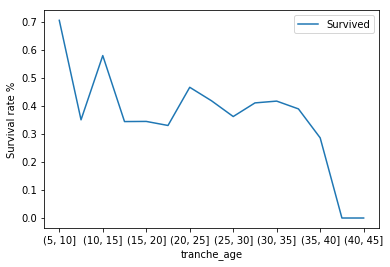

In [129]:
sur_rate_by_age.set_index("Age_bin",drop=False,inplace=True)
ax = sur_rate_by_age.plot(x='Age_bin', y = 'Survived', kind='line')
ax.set_xlabel("tranche_age")
ax.set_ylabel("Survival rate %")
ax.set_xticklabels(age_bins_str)

In [184]:
# mpdeling vars
num_vars = ['Age', 'Fare']
cat_vars = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Cabin']

In [137]:
for col in cat_vars:
    df[col+'_cat'] = df[col].astype('category')


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 18 columns):
Survived        891 non-null int64
Pclass          891 non-null int64
Name            891 non-null object
Sex             891 non-null object
Age             891 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Cabin           891 non-null object
Embarked        891 non-null object
Fare_clip       891 non-null float64
Age_bin         890 non-null category
Pclass_cat      891 non-null category
Sex_cat         891 non-null category
SibSp_cat       891 non-null category
Parch_cat       891 non-null category
Embarked_cat    891 non-null category
Cabin_cat       891 non-null category
dtypes: category(7), float64(2), int64(4), object(5)
memory usage: 138.0+ KB


In [140]:
df.Cabin_cat.cat.categories

Index(['A10', 'A14', 'A16', 'A19', 'A20', 'A23', 'A24', 'A26', 'A31', 'A32',
       ...
       'F E69', 'F G63', 'F G73', 'F2', 'F33', 'F38', 'F4', 'G6', 'T',
       '_MISSING_'],
      dtype='object', length=148)

In [141]:

    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [142]:
final_iv, IV = data_vars(df,df.Survived)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:94: RuntimeWarning: divide by zero encountered in log
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:95: RuntimeWarning: divide by zero encountered in log
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:94: RuntimeWarning: divide by zero encountered in log
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:95: RuntimeWarning: divide by zero encountered in log


TypeError: data type not understood

In [ ]:
! pip install mlencoders
%time

In [168]:
from mlencoders.target_encoder import TargetEncoder

y = pd.Series(df.Survived)
X = df[['Sex', 'Embarked', 'Cabin', 'Pclass', 'SibSp', 'Parch']] # should be string not object

enc = TargetEncoder(cols=X)
X_encoded = enc.fit_transform(X, y)

In [ ]:
# code to use to apply to new dataset (test)
#enc.save_as_object_file('your_file_name')

# Online: loading your encoder and encoding new data X_new
# enc = TargetEncoder()   # no parameters are needed here, they will be loaded automatically
# enc.load_from_object_file('your_file_name')
# enc.transform(X_new)

In [187]:
from sklearn import preprocessing

# df.drop('Age_bin',axis=1, inplace=True)

# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
x_lbl_encoder = df.apply(le.fit_transform)

In [188]:
x_lbl_encoder.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Fare_clip,Pclass_cat,Sex_cat,SibSp_cat,Parch_cat,Embarked_cat,Cabin_cat
PassengerId,,,,,,,,,,,,,,,,,
1,0,2,108,1,28,1,0,523,147,2,18,2,1,1,0,2,147
2,1,0,190,0,52,1,0,596,81,0,207,0,0,1,0,0,81
3,1,2,353,0,34,0,0,669,147,2,41,2,0,0,0,2,147
4,1,0,272,0,48,1,0,49,55,2,189,0,0,1,0,2,55
5,0,2,15,1,48,0,0,472,147,2,43,2,1,0,0,2,147


In [169]:
# logit param optimization
from sklearn import linear_model

In [210]:
# Create cross-validated logistic regression
X_cat = x_lbl_encoder[['Cabin_cat', 'Embarked_cat', 'Pclass_cat', 'SibSp_cat', 'Parch_cat', 'Sex_cat']]
X_num_cat = pd.concat([X_cat, df[['Age', 'Fare_clip']]], axis=1)

clf = linear_model.LogisticRegressionCV(Cs=100, verbose=True, scoring='roc_auc', max_iter=1000)

# Train model
clf.fit(X_num_cat, y)

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.5s finished


LogisticRegressionCV(Cs=100, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=1000,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring='roc_auc', solver='lbfgs', tol=0.0001,
           verbose=True)

In [209]:
print("Accuracy {}". format(clf.score(X_num_cat, y)))

Accuracy 0.7991021324354658
